<a href="https://colab.research.google.com/github/droideronline/Business-Analytics-Movielens-Analysis/blob/main/Movielens-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link:https://grouplens.org/datasets/movielens/1m/


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

## Import Datasets

In [ ]:
# Import Movies Dataset
dfMovies = pd.read_csv("movies.dat",sep="::",names=["MovieID","Title","Genres"],engine='python',encoding='ISO-8859-1')
dfMovies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# Import Ratings Dataset
dfRatings = pd.read_csv("ratings.dat",sep="::",names=["UserID","MovieID","Rating","Timestamp"],engine='python')
dfRatings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
# Import Ratings Dataset
dfUsers = pd.read_csv("users.dat",sep="::",names=["UserID","Gender","Age","Occupation","Zip-code"],engine='python')
dfUsers.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
dfMovies.shape

(3883, 3)

In [ ]:
dfUsers.shape

(6040, 5)

In [ ]:
dfRatings.shape

(132969, 4)

## Create a new dataset [Master_Data]

In [ ]:
dfMovieRatings = pd.merge(pd.merge(dfRatings,dfMovies),dfUsers)
dfMovieRatings.head()


,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [ ]:
# to check whether merging does not changes any dataset
dfMovieRatings.shape

(132969, 10)

In [ ]:
dfMaster =pd.merge(pd.merge(dfRatings, dfMovies), dfUsers)
dfMaster.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [ ]:
dfMaster.to_csv("Master.csv")

## Explore the datasets using visual representations

### User Age Distribution

In [ ]:
# Users with Different Age Groups
dfMaster['Age'].value_counts()

25    50790
18    32458
35    24103
45    11234
50     7743
56     3963
1      2678
Name: Age, dtype: int64

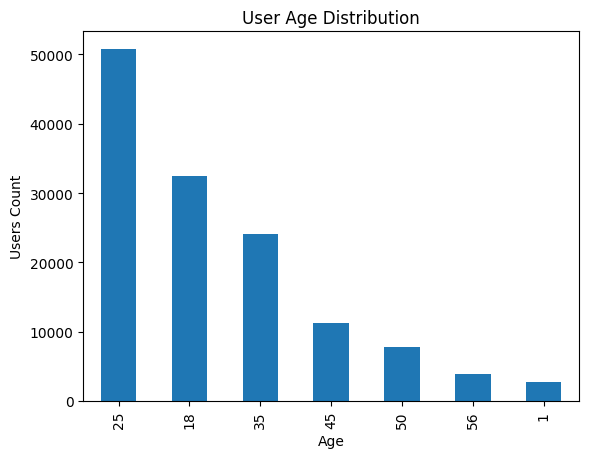

In [ ]:
# Plot for users with different age groups
dfMaster['Age'].value_counts().plot(kind='bar')
plt.xlabel("Age")
plt.title("User Age Distribution")
plt.ylabel('Users Count')
plt.show()

### User rating of the movie “Toy Story”

In [ ]:
# Toy Story
toystoryRating = dfMaster[dfMaster['Title'].str.contains('Toy Story') == True]
toystoryRating

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
40,1,1,5,978824268,Toy Story (1995),Animation|Children's|Comedy,F,1,10,48067
50,1,3114,4,978302174,Toy Story 2 (1999),Animation|Children's|Comedy,F,1,10,48067
417,17,3114,5,978159386,Toy Story 2 (1999),Animation|Children's|Comedy,M,50,1,95350
634,18,1,4,978154768,Toy Story (1995),Animation|Children's|Comedy,F,18,3,95825
938,19,1,5,978555994,Toy Story (1995),Animation|Children's|Comedy,M,1,10,48073
...,...,...,...,...,...,...,...,...,...,...
130314,645,3114,5,975715439,Toy Story 2 (1999),Animation|Children's|Comedy,M,35,20,11215
130551,63,3114,5,977900864,Toy Story 2 (1999),Animation|Children's|Comedy,M,18,4,54902
131241,761,1,4,975451381,Toy Story (1995),Animation|Children's|Comedy,M,18,7,99945
131243,761,3114,5,975451381,Toy Story 2 (1999),Animation|Children's|Comedy,M,18,7,99945


In [ ]:
toystoryRating.groupby(["Title","Rating"]).size()

Title               Rating
Toy Story (1995)    2           8
                    3          54
                    4         112
                    5         119
Toy Story 2 (1999)  1           3
                    2           5
                    3          37
                    4          86
                    5         114
dtype: int64

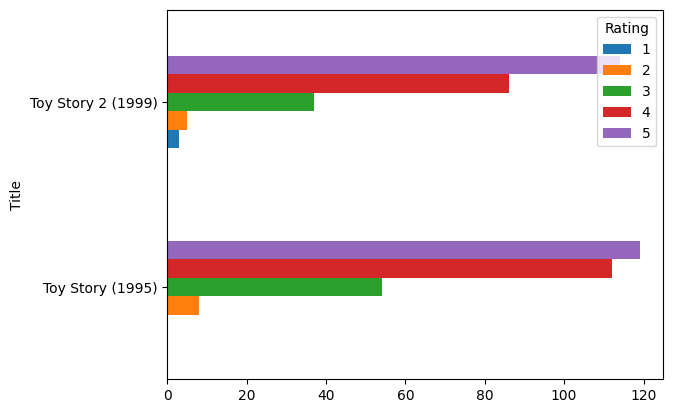

In [ ]:
toystoryRating.groupby(["Title","Rating"]).size().unstack().plot(kind='barh',stacked=False,legend=True)
plt.show()

### Top 25 movies by viewership rating

In [ ]:
dfTop25 = dfMaster.groupby('Title').size().sort_values(ascending=False)[:25]
dfTop25

Title
American Beauty (1999)                                   510
Star Wars: Episode V - The Empire Strikes Back (1980)    432
Star Wars: Episode VI - Return of the Jedi (1983)        422
Star Wars: Episode IV - A New Hope (1977)                417
Jurassic Park (1993)                                     410
Matrix, The (1999)                                       385
Saving Private Ryan (1998)                               376
Terminator 2: Judgment Day (1991)                        374
Men in Black (1997)                                      365
Raiders of the Lost Ark (1981)                           361
Silence of the Lambs, The (1991)                         360
Braveheart (1995)                                        357
Gladiator (2000)                                         351
Back to the Future (1985)                                343
Shakespeare in Love (1998)                               334
Princess Bride, The (1987)                               332
Sixth Sense, The (

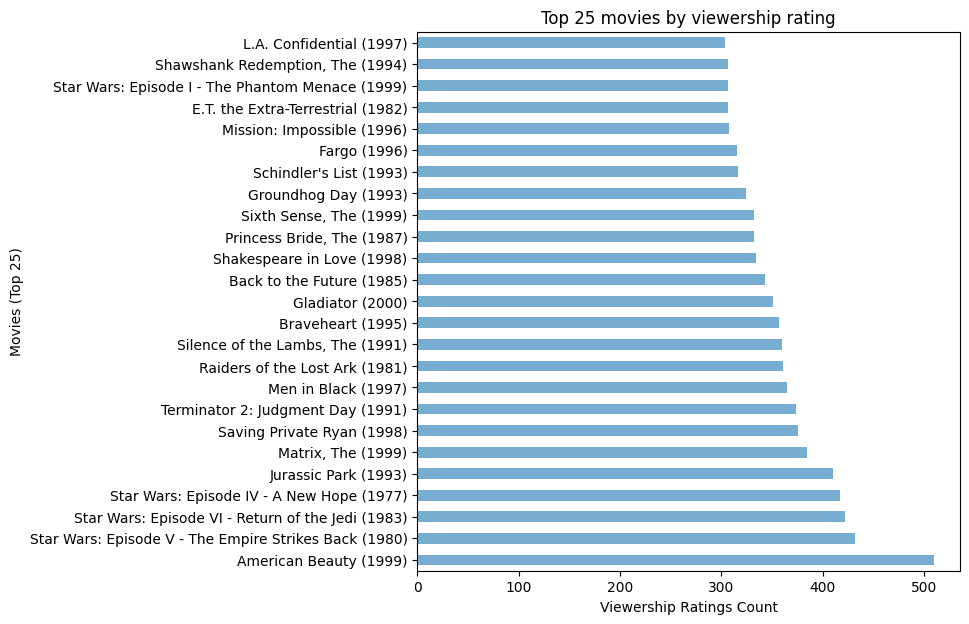

In [ ]:
dfTop25.plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.xlabel("Viewership Ratings Count")
plt.ylabel("Movies (Top 25)")
plt.title("Top 25 movies by viewership rating")
plt.show()


In [ ]:
# Dropping rows with missing values
dfMaster.dropna(axis=0, inplace=True)

# Dropping columns with missing values
dfMaster.dropna(axis=1, inplace=True)

### Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [ ]:
userId = 2696
userRatingById = dfMaster[dfMaster["UserID"] == userId]
userRatingById

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code


Bokeh visualization

In [ ]:
!pip install bokeh


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dfGenres = pd.read_csv("/content/Geners.dat",sep="::",names=["GenreID","Genre"],engine='python')
dfGenres.head()

FileNotFoundError: ignored

In [ ]:
dfGenres.to_csv("Genres.csv")

In [ ]:
import pandas as pd
from bokeh.layouts import row, column
from bokeh.models import ColumnDataSource, Div
from bokeh.plotting import figure, curdoc
from bokeh.transform import factor_cmap
from bokeh.io import output_notebook, show
from bokeh.palettes import Spectral4

# read the master dataset
df = pd.read_csv('Master.csv')
df1=pd.read_csv('Genres.csv')

# create data sources for the plots
movies_source = ColumnDataSource(data=dict(movie_id=df['MovieID'], title=df['Title'], genres=df1['Genre']))
users_source = ColumnDataSource(data=dict(user_id=df['UserID'], gender=df['Gender'], age=df['Age'], occupation=df['Occupation']))
ratings_source = ColumnDataSource(data=dict(movie_id=df['MovieID'], rating=df['Rating']))

# create a scatter plot for movies by genre
genres = sorted(df['Genres'].unique())
colors = factor_cmap('Genres', palette=Spectral4, factors=genres)
movies_plot = figure(title='Movies by Genre', x_axis_label='MovieID', y_axis_label='Genres', tools='pan,box_select')
movies_plot.scatter('MovieID', 'Genres', source=movies_source, color=colors)

# create a histogram for user ages
age_hist, age_edges = np.histogram(df['Age'], bins=20)
age_plot = figure(title='User Age Distribution', x_axis_label='Age', y_axis_label='Count', tools='pan,box_select')
age_plot.quad(top=age_hist, bottom=0, left=age_edges[:-1], right=age_edges[1:], line_color='white')

# create a bar chart for movie ratings
rating_counts = df['Rating'].value_counts().sort_index()
rating_plot = figure(title='Movie Ratings Distribution', x_axis_label='Rating', y_axis_label='Count', tools='pan,box_select')
rating_plot.vbar(x=rating_counts.index.astype(str), top=rating_counts.values, width=0.9)

# create a summary div to display some stats about the dataset
summary_div = Div(text=f"<h2>Movie Recommendation System</h2>"
                       f"<p><b>Number of movies:</b> {len(df['MovieID'].unique())}</p>"
                       f"<p><b>Number of users:</b> {len(df['UserID'].unique())}</p>"
                       f"<p><b>Number of ratings:</b> {len(df)}</p>"
                       f"<p><b>Average rating:</b> {df['Rating'].mean():.2f}</p>")

# display the plots and summary div in the notebook
output_notebook()
show(column(summary_div, row(movies_plot, age_plot, rating_plot)))


## Feature Engineering

### Find out all the unique genres 

In [ ]:
#dfGenres = dfMaster[]
dfGenres = dfMaster['Genres'].str.split("|")

In [ ]:
dfGenres

0                                  [Drama]
1         [Animation, Children's, Musical]
2                       [Musical, Romance]
3                                  [Drama]
4          [Animation, Children's, Comedy]
                        ...               
132964     [Animation, Children's, Comedy]
132965                             [Drama]
132966                             [Drama]
132967                             [Drama]
132968                       [Documentary]
Name: Genres, Length: 132969, dtype: object

In [ ]:

listGenres = set()
for genre in dfGenres:
    listGenres = listGenres.union(set(genre))

In [ ]:
# All Unique genres
listGenres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

### Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [ ]:
ratingsOneHot = dfMaster['Genres'].str.get_dummies("|")

In [ ]:
ratingsOneHot.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dfMaster = pd.concat([dfMaster,ratingsOneHot],axis=1)

In [ ]:
dfMaster.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067,...,0,0,0,1,0,0,0,0,0,0
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dfMaster.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Title', 'Genres', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [ ]:
dfMaster.to_csv("Final_Master.csv")

### Determine the features affecting the ratings of any particular movie.

In [ ]:
dfMaster[["title","Year"]] = dfMaster.Title.str.extract("(.)\s\((.\d+)",expand=True)

In [ ]:
dfMaster = dfMaster.drop(columns=["title"])
dfMaster.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,1975
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067,...,0,0,1,0,0,0,0,0,0,1996
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067,...,0,0,1,0,1,0,0,0,0,1964
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,2000
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,1998


In [ ]:
dfMaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132969 entries, 0 to 132968
Data columns (total 29 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   UserID       132969 non-null  int64 
 1   MovieID      132969 non-null  int64 
 2   Rating       132969 non-null  int64 
 3   Timestamp    132969 non-null  int64 
 4   Title        132969 non-null  object
 5   Genres       132969 non-null  object
 6   Gender       132969 non-null  object
 7   Age          132969 non-null  int64 
 8   Occupation   132969 non-null  int64 
 9   Zip-code     132969 non-null  object
 10  Action       132969 non-null  int64 
 11  Adventure    132969 non-null  int64 
 12  Animation    132969 non-null  int64 
 13  Children's   132969 non-null  int64 
 14  Comedy       132969 non-null  int64 
 15  Crime        132969 non-null  int64 
 16  Documentary  132969 non-null  int64 
 17  Drama        132969 non-null  int64 
 18  Fantasy      132969 non-null  int64 
 19  Fi

In [ ]:
dfMaster['Year'] = dfMaster.Year.astype(int)

In [ ]:
dfMaster['Movie_Age'] = 2000 - dfMaster.Year
dfMaster.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067,...,0,0,0,0,0,0,0,0,1975,25
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067,...,0,1,0,0,0,0,0,0,1996,4
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067,...,0,1,0,1,0,0,0,0,1964,36
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067,...,0,0,0,0,0,0,0,0,2000,0
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067,...,0,0,0,0,0,0,0,0,1998,2


In [ ]:
dfMaster['Gender'] = dfMaster.Gender.str.replace('F','1')

In [ ]:
dfMaster['Gender'] = dfMaster.Gender.str.replace('M','0')

In [ ]:
dfMaster['Gender'] = dfMaster.Gender.astype(int)

In [ ]:
dfMaster.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,1,1,10,48067,...,0,0,0,0,0,0,0,0,1975,25
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,1,1,10,48067,...,0,1,0,0,0,0,0,0,1996,4
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,1,1,10,48067,...,0,1,0,1,0,0,0,0,1964,36
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,1,1,10,48067,...,0,0,0,0,0,0,0,0,2000,0
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,1,1,10,48067,...,0,0,0,0,0,0,0,0,1998,2


In [ ]:
dfGenderAffecting = dfMaster.groupby('Gender').size().sort_values(ascending=False)[:25]
dfGenderAffecting

Gender
0    100927
1     32042
dtype: int64

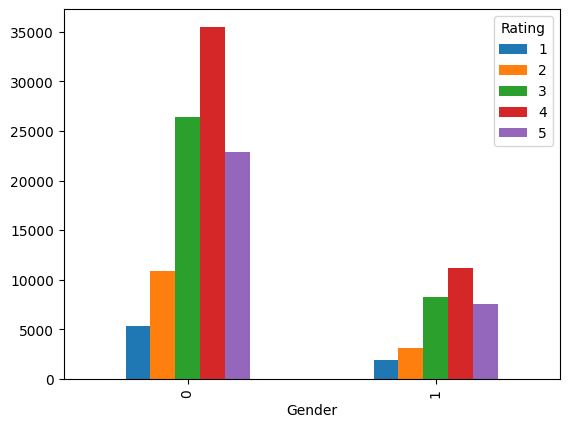

In [ ]:
dfMaster.groupby(["Gender","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

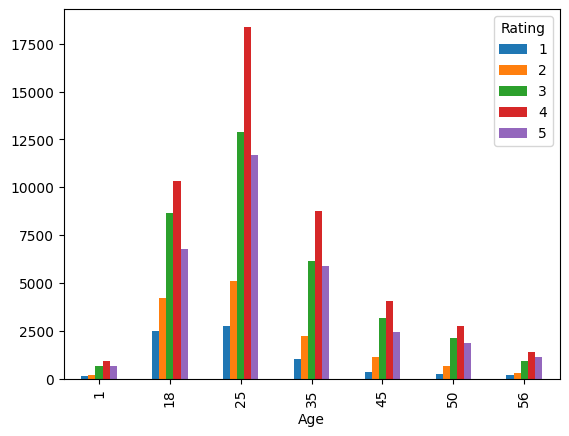

In [ ]:
dfMaster.groupby(["Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

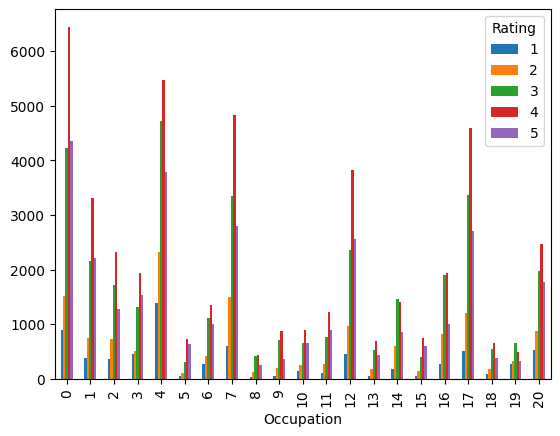

In [ ]:
dfMaster.groupby(["Occupation","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

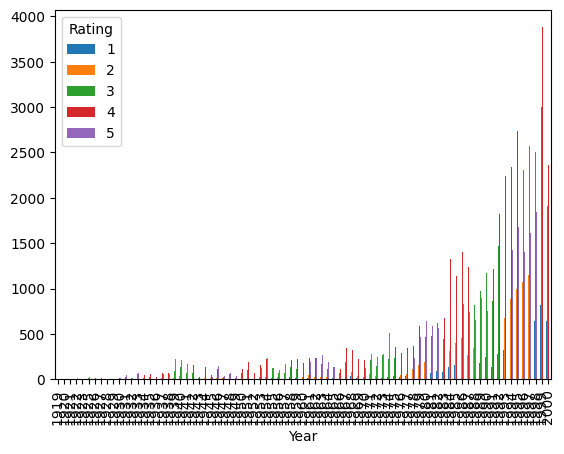

In [ ]:
dfMaster.groupby(["Year","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

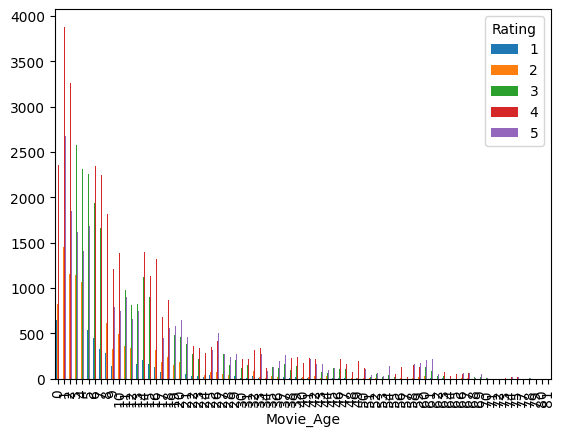

In [ ]:
dfMaster.groupby(["Movie_Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

# Dimensionality reduction

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [ ]:
dfMaster = dfMaster.rename(columns={"Children's": 'Children'})

In [ ]:
# Define the features and labels
features = dfMaster[['MovieID', 'Age', 'Occupation']].values
labels = dfMaster['Rating'].values

## PCA

In [ ]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
pca_features = pca.fit_transform(features)

In [ ]:
labels_pca = pca_features[-1 :]
labels_pca

array([[2011.42663388,   27.75825735,    4.234194  ]])

In [ ]:
pca_features

array([[ -675.57332378,    27.29125192,     4.33139135],
       [-1207.5733154 ,    27.19878936,     4.35063548],
       [ -954.57331938,    27.24276122,     4.34148367],
       ...,
       [ 2081.42663278,    27.77042348,     4.23166187],
       [ 2017.42663379,    27.75930016,     4.23397696],
       [ 2011.42663388,    27.75825735,     4.234194  ]])

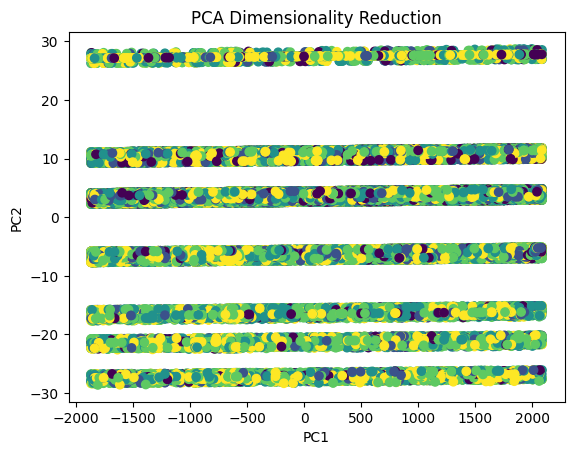

In [ ]:
# Plot the PCA-reduced features
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels, cmap='viridis')
plt.title('PCA Dimensionality Reduction')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## SVD

In [ ]:
# Apply SVD for dimensionality reduction
svd = TruncatedSVD(n_components=3)
svd_features = svd.fit_transform(features)

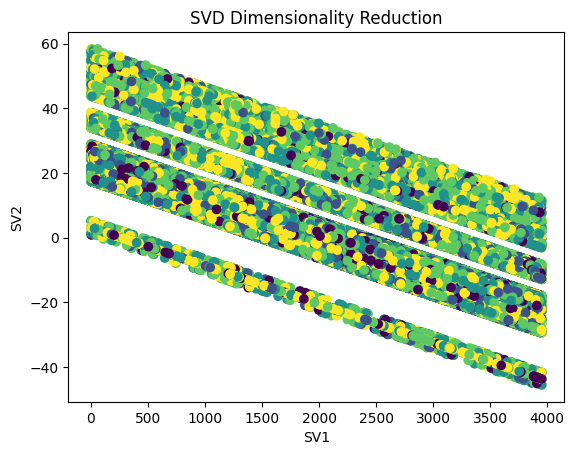

In [ ]:
# Plot the SVD-reduced features
plt.scatter(svd_features[:, 0], svd_features[:, 1], c=labels, cmap='viridis')
plt.title('SVD Dimensionality Reduction')
plt.xlabel('SV1')
plt.ylabel('SV2')
plt.show()

# Develop an appropriate model to predict the movie ratings

In [ ]:
#First 500 extracted records
first_500 = dfMaster[:1000]

In [ ]:
first_500

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,1,1,10,48067,...,0,0,0,0,0,0,0,0,1975,25
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,1,1,10,48067,...,0,1,0,0,0,0,0,0,1996,4
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,1,1,10,48067,...,0,1,0,1,0,0,0,0,1964,36
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,1,1,10,48067,...,0,0,0,0,0,0,0,0,2000,0
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,1,1,10,48067,...,0,0,0,0,0,0,0,0,1998,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,19,2770,3,979428956,Bowfinger (1999),Comedy,0,1,10,48073,...,0,0,0,0,0,0,0,0,1999,1
996,19,3793,4,978299772,X-Men (2000),Action|Sci-Fi,0,1,10,48073,...,0,0,0,0,1,0,0,0,2000,0
997,19,47,4,978554124,Seven (Se7en) (1995),Crime|Thriller,0,1,10,48073,...,0,0,0,0,0,1,0,0,1995,5
998,19,2700,4,978554164,"South Park: Bigger, Longer and Uncut (1999)",Animation|Comedy,0,1,10,48073,...,0,0,0,0,0,0,0,0,1999,1


In [ ]:
#Use the following features:movie id,age,occupation
features = first_500[['MovieID','Age','Occupation']].values

In [ ]:
#Use rating as label
labels = first_500[['Rating']].values

In [ ]:
#Create train and test data set
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

# Regression

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(train, train_labels)
Y_pred = sgd.predict(test)
acc_sgd = round(sgd.score(train, train_labels) * 100, 2)
Y_pred

array([4, 4, 4, 5, 4, 4, 5, 5, 4, 4, 5, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 5,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4,
       4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 5, 4, 5, 4,

In [ ]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(train, train_labels)
Y_pred = linear_svc.predict(test)
acc_linear_svc = round(linear_svc.score(train, train_labels) * 100, 2)
Y_pred

array([3, 3, 3, 4, 3, 3, 4, 4, 3, 3, 4, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 5,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 5, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3,
       3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 5, 3,

In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(train, train_labels)
Y_pred = svc.predict(test)
acc_svc = round(svc.score(train, train_labels) * 100, 2)
Y_pred

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines','Linear SVC','Stochastic Gradient Descent'],
    'Score': [acc_svc,acc_linear_svc,acc_sgd]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,37.61
2,Stochastic Gradient Descent,37.31
1,Linear SVC,25.22


# Classification

In [ ]:

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
Y_pred

array([3, 3, 2, 1, 5, 4, 1, 4, 3, 4, 4, 4, 5, 4, 2, 5, 4, 5, 5, 4, 4, 4,
       3, 3, 3, 4, 3, 5, 3, 4, 5, 3, 5, 2, 3, 1, 3, 3, 2, 2, 5, 3, 4, 4,
       4, 4, 5, 3, 5, 3, 4, 3, 1, 2, 5, 3, 5, 3, 3, 3, 3, 3, 4, 5, 4, 2,
       4, 2, 2, 4, 4, 3, 3, 5, 4, 3, 4, 5, 3, 2, 4, 4, 4, 3, 4, 4, 3, 4,
       4, 1, 4, 4, 4, 2, 3, 4, 4, 4, 4, 4, 3, 4, 5, 1, 5, 3, 2, 5, 2, 1,
       4, 4, 3, 1, 5, 3, 5, 1, 3, 4, 4, 5, 3, 4, 4, 3, 5, 2, 4, 2, 2, 3,
       4, 3, 4, 3, 3, 4, 1, 2, 5, 3, 2, 1, 4, 4, 2, 4, 4, 4, 2, 3, 5, 2,
       5, 4, 4, 5, 3, 1, 4, 5, 4, 2, 4, 4, 4, 1, 3, 3, 1, 3, 2, 5, 3, 1,
       2, 5, 5, 5, 3, 3, 4, 4, 1, 5, 2, 5, 5, 3, 4, 4, 5, 4, 4, 4, 5, 3,
       3, 2, 5, 4, 4, 3, 1, 3, 2, 5, 5, 4, 4, 4, 3, 4, 3, 2, 3, 1, 2, 4,
       5, 5, 4, 5, 3, 4, 3, 3, 2, 3, 3, 5, 4, 3, 4, 4, 2, 5, 5, 4, 5, 4,
       4, 3, 3, 4, 4, 4, 5, 3, 3, 3, 5, 4, 1, 4, 4, 3, 5, 5, 5, 4, 3, 3,
       3, 3, 2, 4, 4, 4, 3, 2, 4, 4, 3, 4, 2, 2, 3, 3, 4, 4, 4, 4, 5, 1,
       3, 3, 1, 3, 4, 2, 4, 5, 5, 3, 4, 5, 4, 4, 3,

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report

# Generate the confusion matrix
cm_knn = confusion_matrix(test_labels, Y_pred)



# Generate the classification report
report_knn = classification_report(test_labels, Y_pred)
print(report_knn)
cm_knn

              precision    recall  f1-score   support

           1       0.05      0.06      0.05        17
           2       0.02      0.04      0.03        25
           3       0.25      0.29      0.27        79
           4       0.41      0.35      0.38       133
           5       0.33      0.28      0.30        76

    accuracy                           0.28       330
   macro avg       0.21      0.20      0.21       330
weighted avg       0.31      0.28      0.29       330



array([[ 1,  2,  6,  7,  1],
       [ 4,  1, 11,  7,  2],
       [ 6,  9, 23, 27, 14],
       [ 6, 19, 37, 46, 25],
       [ 5, 11, 14, 25, 21]])

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
Y_pred

array([5, 3, 2, 1, 5, 3, 1, 4, 5, 4, 4, 4, 5, 3, 5, 5, 4, 5, 5, 4, 4, 4,
       2, 3, 3, 4, 5, 4, 4, 4, 4, 5, 5, 4, 3, 4, 4, 5, 5, 2, 5, 3, 2, 4,
       4, 4, 5, 2, 5, 3, 4, 4, 3, 4, 3, 3, 5, 3, 4, 3, 3, 4, 4, 4, 4, 2,
       5, 2, 5, 5, 4, 4, 4, 5, 4, 3, 5, 4, 2, 2, 4, 3, 4, 3, 2, 5, 4, 4,
       4, 1, 4, 4, 4, 2, 3, 4, 1, 4, 3, 1, 2, 2, 5, 2, 5, 4, 2, 5, 5, 1,
       4, 1, 4, 1, 4, 5, 4, 2, 2, 4, 5, 5, 3, 4, 4, 4, 5, 2, 4, 5, 4, 3,
       4, 4, 4, 3, 5, 3, 4, 5, 4, 3, 2, 3, 4, 3, 4, 3, 4, 4, 3, 3, 5, 2,
       4, 4, 4, 5, 5, 2, 4, 3, 5, 1, 4, 5, 4, 1, 4, 4, 3, 3, 4, 5, 5, 3,
       3, 4, 5, 5, 3, 3, 4, 4, 4, 5, 2, 4, 5, 5, 5, 4, 5, 4, 4, 4, 4, 4,
       3, 2, 5, 4, 4, 5, 1, 3, 5, 5, 5, 1, 3, 2, 4, 5, 5, 5, 3, 3, 3, 3,
       4, 5, 4, 3, 3, 4, 3, 4, 4, 3, 3, 4, 4, 5, 4, 4, 3, 5, 3, 3, 2, 4,
       4, 4, 3, 4, 4, 4, 5, 3, 4, 3, 4, 4, 3, 4, 4, 3, 5, 5, 5, 4, 3, 3,
       4, 3, 2, 4, 1, 4, 5, 2, 4, 3, 3, 4, 4, 2, 4, 4, 4, 5, 4, 5, 4, 4,
       3, 5, 2, 4, 4, 5, 4, 5, 3, 3, 4, 5, 4, 4, 5,

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report

# Generate the confusion matrix
cm_dt = confusion_matrix(test_labels, Y_pred)



# Generate the classification report
report_dt = classification_report(test_labels, Y_pred)
print(report_dt)
cm_dt

              precision    recall  f1-score   support

           1       0.07      0.06      0.06        17
           2       0.10      0.12      0.11        25
           3       0.20      0.18      0.19        79
           4       0.38      0.40      0.39       133
           5       0.37      0.38      0.38        76

    accuracy                           0.30       330
   macro avg       0.23      0.23      0.23       330
weighted avg       0.30      0.30      0.30       330



array([[ 1,  2,  6,  7,  1],
       [ 0,  3,  9, 12,  1],
       [ 4,  6, 14, 39, 16],
       [ 6, 14, 29, 53, 31],
       [ 3,  5, 11, 28, 29]])

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
Y_pred

array([5, 3, 2, 1, 5, 3, 1, 4, 5, 4, 4, 4, 5, 4, 5, 5, 4, 5, 5, 4, 4, 4,
       2, 3, 3, 4, 5, 4, 4, 4, 4, 5, 5, 4, 3, 4, 4, 5, 5, 2, 3, 3, 2, 4,
       4, 4, 4, 2, 5, 3, 4, 4, 3, 4, 3, 4, 5, 3, 4, 3, 3, 4, 4, 4, 4, 2,
       5, 2, 5, 5, 4, 4, 4, 5, 4, 3, 5, 5, 2, 2, 4, 3, 4, 3, 2, 5, 5, 4,
       4, 1, 4, 4, 4, 2, 3, 4, 1, 4, 5, 1, 2, 2, 5, 2, 5, 4, 2, 5, 5, 1,
       4, 1, 4, 1, 4, 5, 5, 2, 2, 4, 5, 5, 3, 4, 4, 4, 5, 2, 4, 5, 4, 3,
       4, 4, 4, 3, 3, 3, 4, 5, 4, 3, 2, 3, 4, 3, 4, 3, 4, 4, 3, 3, 4, 2,
       4, 4, 4, 5, 5, 2, 4, 3, 5, 1, 4, 5, 4, 1, 4, 4, 3, 3, 4, 5, 5, 3,
       3, 3, 5, 5, 3, 3, 4, 4, 4, 5, 2, 4, 5, 5, 5, 4, 5, 5, 4, 4, 4, 4,
       3, 2, 5, 4, 4, 5, 1, 3, 5, 5, 5, 1, 5, 2, 4, 5, 5, 5, 3, 3, 3, 3,
       4, 5, 4, 3, 3, 4, 3, 4, 4, 3, 3, 4, 4, 5, 4, 4, 3, 4, 5, 3, 2, 4,
       4, 4, 3, 5, 4, 4, 5, 3, 4, 3, 4, 4, 3, 4, 4, 3, 5, 4, 5, 4, 3, 3,
       4, 3, 2, 4, 1, 4, 5, 2, 4, 3, 3, 4, 4, 2, 4, 4, 4, 5, 4, 5, 4, 4,
       3, 5, 2, 4, 4, 5, 4, 5, 3, 3, 4, 5, 4, 4, 5,

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report

# Generate the confusion matrix
cm_rf = confusion_matrix(test_labels, Y_pred)



# Generate the classification report
report_rf = classification_report(test_labels, Y_pred)
print(report_rf)
cm_rf

              precision    recall  f1-score   support

           1       0.07      0.06      0.06        17
           2       0.10      0.12      0.11        25
           3       0.18      0.15      0.16        79
           4       0.39      0.41      0.40       133
           5       0.36      0.38      0.37        76

    accuracy                           0.30       330
   macro avg       0.22      0.22      0.22       330
weighted avg       0.29      0.30      0.30       330



array([[ 1,  2,  6,  7,  1],
       [ 0,  3, 10, 10,  2],
       [ 4,  6, 12, 40, 17],
       [ 6, 14, 28, 54, 31],
       [ 3,  5, 12, 27, 29]])

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, train_labels)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, train_labels) * 100, 2)
Y_pred

array([4, 4, 4, 4, 4, 4, 4, 5, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5,
       4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 5, 4, 3, 4, 5, 4, 5, 4, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 5, 4, 4, 4,
       4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4,
       4, 4, 4, 5, 4, 4, 4, 4, 4, 3, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4,
       4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 3, 5, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4,
       4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4,
       4, 5, 4, 4, 4, 4, 4, 4, 3, 4, 5, 4, 5, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       4, 4, 4, 5, 5, 3, 5, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5, 4, 5, 4,

In [ ]:
# Generate the confusion matrix
cm_nb = confusion_matrix(test_labels, Y_pred)



# Generate the classification report
report_nb = classification_report(test_labels, Y_pred)
print(report_nb)
cm_nb

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00        25
           3       0.43      0.13      0.20        79
           4       0.42      0.86      0.56       133
           5       0.39      0.18      0.25        76

    accuracy                           0.42       330
   macro avg       0.25      0.23      0.20       330
weighted avg       0.36      0.42      0.33       330



array([[  0,   0,   0,  17,   0],
       [  0,   0,   2,  21,   2],
       [  0,   0,  10,  59,  10],
       [  0,   0,   9, 114,  10],
       [  0,   0,   2,  60,  14]])

In [ ]:
models = pd.DataFrame({
    'Model': ['KNN','Random Forest','Decision Tree','Naive Bayes'],
    'Score': [acc_knn,acc_random_forest, acc_decision_tree,acc_gaussian]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,99.10
2,Decision Tree,99.10
0,KNN,60.45
3,Naive Bayes,38.21


# PCA Prediction

In [ ]:

features = pca_features[:, :2]


In [ ]:
features

array([[ -675.57332378,    27.29125192],
       [-1207.5733154 ,    27.19878936],
       [ -954.57331938,    27.24276122],
       ...,
       [ 2081.42663278,    27.77042348],
       [ 2017.42663379,    27.75930016],
       [ 2011.42663388,    27.75825735]])

In [ ]:
#Use rating as label
labels = pca_features[:, 2]

In [ ]:
labels

array([4.33139135, 4.35063548, 4.34148367, ..., 4.23166187, 4.23397696,
       4.234194  ])

In [ ]:
ilabels = np.round(labels).astype(int)
ilabels

array([4, 4, 4, ..., 4, 4, 4])

In [ ]:
ipca_features = np.round(features).astype(int)
ipca_features

array([[ -676,    27],
       [-1208,    27],
       [ -955,    27],
       ...,
       [ 2081,    28],
       [ 2017,    28],
       [ 2011,    28]])

In [ ]:

# Print the shape of your input data and labels
print('Input data shape:', pca_features.shape)
print('Labels shape:', labels.shape)


Input data shape: (132969, 3)
Labels shape: (132969,)


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# Discretize the label data into 5 bins
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
labels_discrete = discretizer.fit_transform(labels.reshape(-1, 1)).flatten()


## Decision Tree

In [ ]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(pca_features, labels_discrete, test_size=0.33, random_state=42)

# Create a pipeline with data scaling, PCA, and decision tree classifier
pca_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3)),
    ('dt', DecisionTreeClassifier())
])

# Fit the pipeline on the training data
pca_dt.fit(X_train, y_train)

# Evaluate the model on the test data
pdt_accuracy = pca_dt.score(X_test, y_test)
print('Accuracy:', pdt_accuracy)


Accuracy: 0.9989744758432088


In [ ]:
# Generate the predicted labels
y_pred = pca_dt.predict(X_test)

# Generate the confusion matrix
pdt = confusion_matrix(y_test, y_pred)
y_pred

array([0., 1., 0., ..., 0., 0., 4.])

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report

# Generate the confusion matrix
pdt = confusion_matrix(y_test, y_pred)



# Generate the classification report
report_pcadt = classification_report(y_test, y_pred)
print(report_pcadt)
pdt

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8875
         1.0       1.00      1.00      1.00      8766
         2.0       1.00      1.00      1.00      8658
         3.0       1.00      1.00      1.00      8880
         4.0       1.00      1.00      1.00      8701

    accuracy                           1.00     43880
   macro avg       1.00      1.00      1.00     43880
weighted avg       1.00      1.00      1.00     43880



array([[8868,    7,    0,    0,    0],
       [   6, 8754,    6,    0,    0],
       [   0,   10, 8641,    7,    0],
       [   0,    0,    3, 8876,    1],
       [   0,    0,    0,    5, 8696]])

## Random Forest

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(pca_features, labels_discrete, test_size=0.33, random_state=42)

# Create a pipeline with data scaling, PCA, and random forest classifier
pca_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3)),
    ('rf', RandomForestClassifier())
])

# Fit the pipeline on the training data
pca_rf.fit(X_train, y_train)

# Evaluate the model on the test data
prf_accuracy = pca_rf.score(X_test, y_test)
print('Accuracy:', prf_accuracy)

Accuracy: 0.9999316317228806


In [ ]:
# Generate the predicted labels
y_pred = pca_rf.predict(X_test)

# Generate the confusion matrix
prf = confusion_matrix(y_test, y_pred)
y_pred

array([0., 1., 0., ..., 0., 0., 4.])

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report

# Generate the confusion matrix
prf = confusion_matrix(y_test, y_pred)



# Generate the classification report
report_prf = classification_report(y_test, y_pred)
print(report_prf)
prf

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8875
         1.0       1.00      1.00      1.00      8766
         2.0       1.00      1.00      1.00      8658
         3.0       1.00      1.00      1.00      8880
         4.0       1.00      1.00      1.00      8701

    accuracy                           1.00     43880
   macro avg       1.00      1.00      1.00     43880
weighted avg       1.00      1.00      1.00     43880



array([[8875,    0,    0,    0,    0],
       [   0, 8766,    0,    0,    0],
       [   0,    1, 8656,    1,    0],
       [   0,    0,    0, 8880,    0],
       [   0,    0,    0,    1, 8700]])

# SVD Prediction

In [ ]:
features = svd_features[:, :2]

In [ ]:
features

array([[1192.96001877,  -10.91909073],
       [ 660.99760018,   -4.60404118],
       [ 913.97972782,   -7.60725084],
       ...,
       [3949.76525942,  -43.6457667 ],
       [3885.7697805 ,  -42.88606149],
       [3879.77020435,  -42.81483913]])

In [ ]:
labels = svd_features[:, 2]

In [ ]:
labels

array([8.78447972, 9.10908094, 8.95471232, ..., 7.10228882, 7.14133859,
       7.1449995 ])

In [ ]:
ilabels = np.round(labels).astype(int)
ilabels

array([9, 9, 9, ..., 7, 7, 7])

In [ ]:
ipca_features = np.round(features).astype(int)
ipca_features

array([[1193,  -11],
       [ 661,   -5],
       [ 914,   -8],
       ...,
       [3950,  -44],
       [3886,  -43],
       [3880,  -43]])

In [ ]:
# Print the shape of your input data and labels
print('Input data shape:', pca_features.shape)
print('Labels shape:', labels.shape)


Input data shape: (132969, 3)
Labels shape: (132969,)


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# Discretize the label data into 5 bins
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
labels_discrete = discretizer.fit_transform(labels.reshape(-1, 1)).flatten()

## DecisionTree

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(svd_features, labels_discrete, test_size=0.33, random_state=42)

# Create a pipeline with data scaling, TruncatedSVD, and decision tree classifier
svd_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('svd', TruncatedSVD(n_components=1)),
    ('dt', DecisionTreeClassifier())
])

# Fit the pipeline on the training data
svd_dt.fit(X_train, y_train)

# Evaluate the model on the test data
sdt_accuracy = svd_dt.score(X_test, y_test)
print('Accuracy:', sdt_accuracy)


Accuracy: 0.6625797629899727


In [ ]:
# Generate the predicted labels
y_pred = svd_dt.predict(X_test)

# Generate the confusion matrix
sdt = confusion_matrix(y_test, y_pred)
y_pred

array([0., 1., 0., ..., 1., 1., 3.])

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report

# Generate the confusion matrix
sdt = confusion_matrix(y_test, y_pred)



# Generate the classification report
report_sdt = classification_report(y_test, y_pred)
print(report_sdt)
sdt

              precision    recall  f1-score   support

         0.0       0.66      0.66      0.66      8798
         1.0       0.66      0.66      0.66      8862
         2.0       0.73      0.75      0.74      8669
         3.0       0.59      0.58      0.59      8820
         4.0       0.67      0.66      0.67      8731

    accuracy                           0.66     43880
   macro avg       0.66      0.66      0.66     43880
weighted avg       0.66      0.66      0.66     43880



array([[5815,  806,  552,  915,  710],
       [ 790, 5805,  488, 1011,  768],
       [ 488,  458, 6499,  698,  526],
       [ 983, 1065,  730, 5155,  887],
       [ 699,  672,  668,  892, 5800]])

## Random Forest

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(svd_features, labels_discrete, test_size=0.33, random_state=42)

# Create a pipeline with data scaling, TruncatedSVD, and decision tree classifier
svd_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('svd', TruncatedSVD(n_components=1)),
    ('rf', DecisionTreeClassifier())
])

# Fit the pipeline on the training data
svd_rf.fit(X_train, y_train)

# Evaluate the model on the test data
srf_accuracy = svd_rf.score(X_test, y_test)
print('Accuracy:', srf_accuracy)

Accuracy: 0.6625797629899727


In [ ]:
# Generate the predicted labels
y_pred = svd_rf.predict(X_test)

# Generate the confusion matrix
srf = confusion_matrix(y_test, y_pred)
y_pred

array([0., 1., 0., ..., 1., 1., 3.])

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report

# Generate the confusion matrix
srf = confusion_matrix(y_test, y_pred)



# Generate the classification report
report_srf = classification_report(y_test, y_pred)
print(report_srf)
srf

              precision    recall  f1-score   support

         0.0       0.66      0.66      0.66      8798
         1.0       0.66      0.66      0.66      8862
         2.0       0.73      0.75      0.74      8669
         3.0       0.59      0.58      0.59      8820
         4.0       0.67      0.66      0.67      8731

    accuracy                           0.66     43880
   macro avg       0.66      0.66      0.66     43880
weighted avg       0.66      0.66      0.66     43880



array([[5815,  806,  552,  915,  710],
       [ 790, 5805,  488, 1011,  768],
       [ 488,  458, 6499,  698,  526],
       [ 983, 1065,  730, 5155,  887],
       [ 699,  672,  668,  892, 5800]])

# result

In [ ]:
models = pd.DataFrame({
    'Model': ['PCA Random Forest','PCA Decision Tree','SVD Random Forest','SVD Decision Tree'],
    'Score': [prf_accuracy*100,pdt_accuracy*100, srf_accuracy*100,sdt_accuracy*100]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,PCA Random Forest,99.993163
1,PCA Decision Tree,99.897448
2,SVD Random Forest,66.257976
3,SVD Decision Tree,66.257976


In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095440 sha256=4890022458f41220f719fcdaf258aa50ebc6ac7109fe54191a96a5d84adb5253
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

# Load the dataset
df_ratings = pd.read_csv('ratings.dat', sep='::', names=['user_id', 'movie_id', 'rating', 'timestamp'], engine='python')
df_movies = pd.read_csv('movies.dat', sep='::', names=['movie_id', 'title', 'genres'], engine='python', encoding='ISO-8859-1')

df_users = pd.read_csv('users.dat', sep='::', names=['user_id', 'gender', 'age', 'occupation', 'zip_code'], engine='python')

# Convert the data into the format required by Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_ratings[['user_id', 'movie_id', 'rating']], reader)

# Use the SVD algorithm for collaborative filtering
algo = SVD()

# Evaluate the algorithm
cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Print the average RMSE and MAE scores
print('Average RMSE:', np.mean(cv_results['test_rmse']))
print('Average MAE:', np.mean(cv_results['test_mae']))

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9260  0.9265  0.9245  0.9176  0.9169  0.9223  0.0042  
MAE (testset)     0.7337  0.7288  0.7283  0.7238  0.7216  0.7272  0.0042  
Fit time          2.01    4.64    2.07    2.26    1.82    2.56    1.05    
Test time         0.33    0.51    0.25    0.21    0.18    0.30    0.12    
Average RMSE: 0.9222920226155035
Average MAE: 0.7272139904158084


In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load a subset of the ratings dataset
df_ratings = pd.read_csv('https://github.com/droideronline/Business-Analytics-Movielens-Analysis/blob/main/ratings.dat', sep='::', names=['user_id', 'movie_id', 'rating', 'timestamp'], engine='python', nrows=100000)

# Load the movies dataset
df_movies = pd.read_csv('https://github.com/droideronline/Business-Analytics-Movielens-Analysis/blob/main/movies.dat', sep='::', names=['movie_id', 'title', 'genres'], engine='python', encoding='ISO-8859-1')

# Create a new dataset with only the necessary columns
df_basket = df_ratings[['user_id', 'movie_id']].copy()

# Convert the dataset into a one-hot encoded matrix
one_hot = pd.get_dummies(df_basket['movie_id'])
df_basket.drop('movie_id', inplace=True, axis=1)
df_basket = df_basket.join(one_hot)

# Find frequent itemsets using Apriori
frequent_itemsets = apriori(df_basket, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print the most important association rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head(10))



ValueError: ignored

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
df_movies = pd.read_csv('movies.dat', sep='::', names=['movie_id', 'title', 'genres'], engine='python', encoding='ISO-8859-1')

# Create a genre matrix
tfidf = TfidfVectorizer()
genre_matrix = tfidf.fit_transform(df_movies['genres'])

# Compute cosine similarity between all movie pairs
cosine_sim = cosine_similarity(genre_matrix, genre_matrix)

# Define function to get top n similar movies
def get_similar_movies(movie_id, n=10):
    # Get the row index of the given movie
    idx = df_movies[df_movies['movie_id'] == movie_id].index[0]
    # Get the pairwise similarity scores of this movie with all others
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the movies based on their similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the movie indices of the top n similar movies
    movie_indices = [i[0] for i in sim_scores[1:n+1]]
    # Return the titles of the top n similar movies
    return df_movies['title'].iloc[movie_indices]

# Example usage: get top 10 movies similar to Toy Story (1995)
get_similar_movies(1, 10)
